In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from numpy import linalg as LA

In [2]:
new_york = pd.read_csv('data_Coords/newyorkcoords.csv')

In [3]:
new_york

,Unnamed: 0,index,Price,Beds,Baths,Post_Time,Address,City,State,Zipcode,Lat,Long
0,0,4,"$3,375",1 Bed,1 Bath,12m ago,20 Avenue A,New York,NY,10009,40.722721,-73.985637
1,1,6,"$3,600",1 Bed,1 Bath,24m ago,Madison Ave & E 30th St,New York,NY,10016,40.745435,-73.984525
2,2,7,"$3,295",1 Bed,1 Bath,31m ago,Lexington Ave & E 27th St,New York,NY,10016,40.742149,-73.982930
3,3,8,"$3,500",1 Bed,1 Bath,34m ago,York Ave & E 88th St,New York,NY,10128,40.777073,-73.946445
4,4,17,"$4,400",1 Bed,1 Bath,3h ago,160 West 73rd Street,New York,NY,10023,40.778807,-73.980542
...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,1655,"$3,850",1 Bed,1 Bath,5d+ ago,2nd Ave & E 39th St,New York,NY,10016,40.747616,-73.973981
990,990,1656,"$3,995",1 Bed,1 Bath,5d+ ago,2nd Ave & E 57th St,New York,NY,10022,40.759011,-73.965693
991,991,1658,"$2,362",1 Bed,1 Bath,5d+ ago,2324 28th Ave,New York,NY,11102,43.211887,-75.728426
992,992,1663,"$1,500",1 Bed,1 Bath,5d+ ago,Furness Pl,New York,NY,10314,40.584733,-74.151072


In [4]:
def clean_csv(df):        
    df['Price'] = df['Price'].str.replace(',', '')
    df['Price'] = df['Price'].replace({r'\$':''}, regex = True).replace(",", "")
    return df

Text(0, 0.5, 'Longitude')

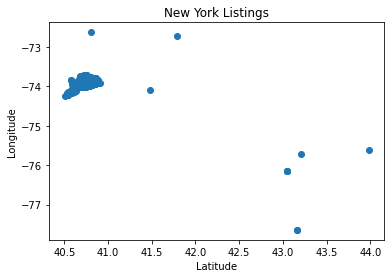

In [5]:
plt.title("New York Listings")
plt.scatter(new_york['Lat'], new_york['Long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

## Remove outliers:

As they represent listings outside the city

In [6]:
df = pd.DataFrame(clean_csv(new_york))
df1 = df.loc[df["Lat"] < 41.3]
df1 = df1.loc[df1["Long"] < -73]

Text(0, 0.5, 'Longitude')

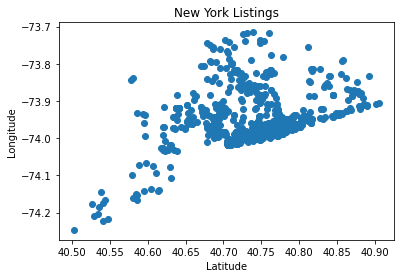

In [7]:
plt.title("New York Listings")
plt.scatter(df1['Lat'], df1['Long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [8]:
print("Min and Max Latitudes:", min(df1['Lat']), max(df1['Lat']))
print("Min and Max Longitudes:", min(df1['Long']), max(df1['Long']))

Min and Max Latitudes: 40.5031627 40.90450673469174
Min and Max Longitudes: -74.24649027734604 -73.7150497


(array([53., 53., 37., 19., 42., 78., 30., 11., 10., 10., 12.,  9., 10.,
        11., 54., 46., 22., 14., 29., 22., 25., 19., 19., 36., 13., 10.,
        20., 13., 16., 13.,  9., 12., 18., 12., 18., 13., 14., 10., 16.,
        11., 10.,  7.,  9., 10., 12.,  7.,  8.,  8.,  7.,  8.]),
 array([  0.  ,   7.38,  14.76,  22.14,  29.52,  36.9 ,  44.28,  51.66,
         59.04,  66.42,  73.8 ,  81.18,  88.56,  95.94, 103.32, 110.7 ,
        118.08, 125.46, 132.84, 140.22, 147.6 , 154.98, 162.36, 169.74,
        177.12, 184.5 , 191.88, 199.26, 206.64, 214.02, 221.4 , 228.78,
        236.16, 243.54, 250.92, 258.3 , 265.68, 273.06, 280.44, 287.82,
        295.2 , 302.58, 309.96, 317.34, 324.72, 332.1 , 339.48, 346.86,
        354.24, 361.62, 369.  ]),
 <BarContainer object of 50 artists>)

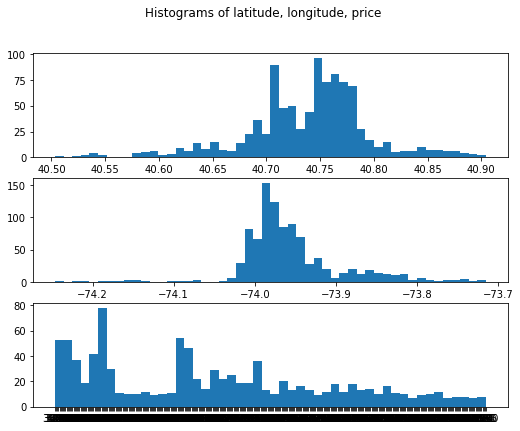

In [9]:

fig, axs = plt.subplots(3)
fig.set_size_inches(8.5, 6.5)
fig.suptitle('Histograms of latitude, longitude, price')
axs[0].hist(df1['Lat'], bins=50)
axs[1].hist(df1['Long'], bins = 50)
axs[2].hist(df1['Price'], bins = 50)

In [10]:
lat_norm = (preprocessing.normalize([df1['Lat']])).flatten()
long_norm = (preprocessing.normalize([df1['Long']])).flatten()
price_norm = (preprocessing.normalize([df1['Price']])).flatten()

# lat_norm = df1['Lat'] - 40
# long_norm = df1['Long'] + 75
# price = df1['Price']

#df_norm = pd.DataFrame(Latitude = lat_norm)

df_norm = pd.DataFrame(data={"latitude": lat_norm, "longitude": long_norm, "price": price_norm})

df_norm

,latitude,longitude,price
0,0.032013,-0.032039,0.028241
1,0.032031,-0.032038,0.030124
2,0.032028,-0.032037,0.027572
3,0.032056,-0.032022,0.029287
4,0.032057,-0.032036,0.036818
...,...,...,...
970,0.031986,-0.032028,0.030082
971,0.032033,-0.032033,0.032216
972,0.032041,-0.032030,0.033429
973,0.031904,-0.032110,0.012552


(array([ 6.,  6., 13., 39., 57., 47., 50., 43., 51., 34., 43., 40., 55.,
        42., 42., 37., 59., 27., 39., 30., 26., 32., 25., 16., 13., 26.,
        16., 16.,  6.,  1.,  6.,  6.,  4.,  4.,  1.,  1.,  1.,  6.,  0.,
         2.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([0.00836779, 0.0098735 , 0.0113792 , 0.0128849 , 0.0143906 ,
        0.0158963 , 0.017402  , 0.0189077 , 0.0204134 , 0.0219191 ,
        0.0234248 , 0.0249305 , 0.02643621, 0.02794191, 0.02944761,
        0.03095331, 0.03245901, 0.03396471, 0.03547041, 0.03697611,
        0.03848181, 0.03998751, 0.04149321, 0.04299891, 0.04450462,
        0.04601032, 0.04751602, 0.04902172, 0.05052742, 0.05203312,
        0.05353882, 0.05504452, 0.05655022, 0.05805592, 0.05956162,
        0.06106733, 0.06257303, 0.06407873, 0.06558443, 0.06709013,
        0.06859583, 0.07010153, 0.07160723, 0.07311293, 0.07461863,
        0.07612433, 0.07763004, 0.07913574, 0.08064144, 0.08214714,
        0.08365284]),
 <BarContainer

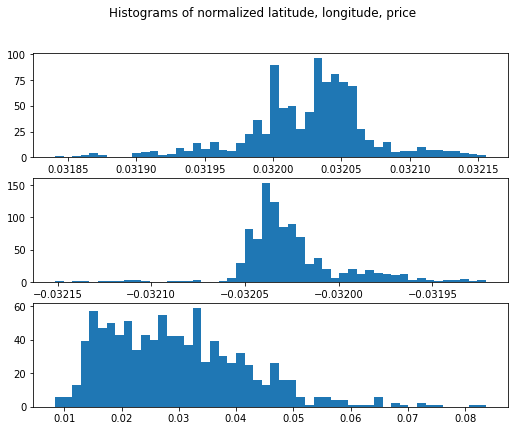

In [11]:

fig, axs = plt.subplots(3)
fig.set_size_inches(8.5, 6.5)
fig.suptitle('Histograms of normalized latitude, longitude, price')
axs[0].hist(df_norm['latitude'], bins=50)
axs[1].hist(df_norm['longitude'], bins = 50)
axs[2].hist(df_norm['price'], bins = 50)

In [12]:
LA.norm(df_norm['latitude'])

0.9999999999999998

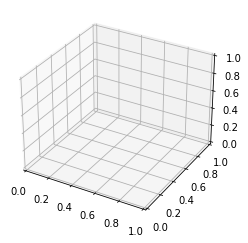

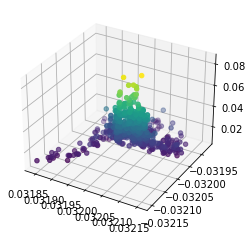

In [15]:

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
zdata = price_norm
xdata = lat_norm
ydata = long_norm
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

<AxesSubplot:>

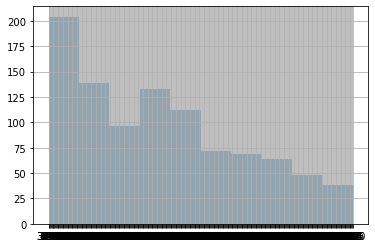

In [16]:
df1["Price"].hist(bins=10)

In [17]:
df1

,Unnamed: 0,index,Price,Beds,Baths,Post_Time,Address,City,State,Zipcode,Lat,Long
0,0,4,3375,1 Bed,1 Bath,12m ago,20 Avenue A,New York,NY,10009,40.722721,-73.985637
1,1,6,3600,1 Bed,1 Bath,24m ago,Madison Ave & E 30th St,New York,NY,10016,40.745435,-73.984525
2,2,7,3295,1 Bed,1 Bath,31m ago,Lexington Ave & E 27th St,New York,NY,10016,40.742149,-73.982930
3,3,8,3500,1 Bed,1 Bath,34m ago,York Ave & E 88th St,New York,NY,10128,40.777073,-73.946445
4,4,17,4400,1 Bed,1 Bath,3h ago,160 West 73rd Street,New York,NY,10023,40.778807,-73.980542
...,...,...,...,...,...,...,...,...,...,...,...,...
988,988,1651,3595,1 Bed,1 Bath,5d+ ago,81 Clifton Pl,New York,NY,11238,40.688274,-73.960743
989,989,1655,3850,1 Bed,1 Bath,5d+ ago,2nd Ave & E 39th St,New York,NY,10016,40.747616,-73.973981
990,990,1656,3995,1 Bed,1 Bath,5d+ ago,2nd Ave & E 57th St,New York,NY,10022,40.759011,-73.965693
992,992,1663,1500,1 Bed,1 Bath,5d+ ago,Furness Pl,New York,NY,10314,40.584733,-74.151072


In [18]:
correlation_matrix = df1.corr()


## The Problem:

Can we predict the Price of a 1 Bedroom, 1 Bathroom in New York in a given Coordinate

We will make two models:

- 1: A Normal 3D Linear Regression with Scipy
- 2: A ML 3D Regression with Sci-kit learn

In [19]:
X = df1[['Lat', 'Long']].copy()
y = df1[['Price']].copy()

In [20]:
X

,Lat,Long
0,40.722721,-73.985637
1,40.745435,-73.984525
2,40.742149,-73.982930
3,40.777073,-73.946445
4,40.778807,-73.980542
...,...,...
988,40.688274,-73.960743
989,40.747616,-73.973981
990,40.759011,-73.965693
992,40.584733,-74.151072


In [21]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [22]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
         Lat       Long
0  40.722721 -73.985637
1  40.745435 -73.984525
2  40.742149 -73.982930
3  40.777073 -73.946445
4  40.778807 -73.980542
The predictions are
[3316.66666667 3600.         3295.         3500.         4200.        ]


In [23]:
print(y.head())

  Price
0  3375
1  3600
2  3295
3  3500
4  4400


In [51]:
X_train, X_test, y_train, y_test = train_test_split(df1[['Lat', 'Long']], df1['Price'], test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("RMSE: ", np.sqrt(mse))

Mean Absolute Error:  1070.2956278322695
Mean Squared Error:  1996778.9480839102
RMSE:  1413.0742896549743


In [52]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("RMSE: ", np.sqrt(mse))

Mean Absolute Error:  698.9381359381359
Mean Squared Error:  1251033.9576656588
RMSE:  1118.4962930942859


In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_norm[['latitude', 'longitude']], df_norm['price'], test_size=0.2)

# Train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error and  mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Normalized Mean Absolute Error: ", mae)
print("Normailzed Mean Squared Error: ", mse)
print("Normalized RMSE: ", np.sqrt(mse))

Normalized Mean Absolute Error:  0.0061629646618457535
Normailzed Mean Squared Error:  9.113554681277528e-05
Normalized RMSE:  0.009546493953948501


In [47]:
min_alt = min(df1['Lat'])
max_alt = max(df1['Lat'])
min_long = min(df1['Long'])
max_long = max(df1['Long'])
print(min_alt, max_alt, min_long, max_long)

40.5031627 40.90450673469174 -74.24649027734604 -73.7150497


In [45]:
y_pred

array([0.04803114, 0.0464831 , 0.01589881, 0.01757237, 0.01338847,
       0.04485138, 0.03342934, 0.05480905, 0.021045  , 0.01250985,
       0.04485138, 0.03639991, 0.03891024, 0.03221601, 0.01464364,
       0.01757237, 0.02794843, 0.02594016, 0.05941134, 0.02171443,
       0.0205011 , 0.02788846, 0.03179762, 0.02928728, 0.04426563,
       0.05480905, 0.03514474, 0.01661426, 0.03953783, 0.01548042,
       0.01673559, 0.02462084, 0.00920457, 0.02635855, 0.0333875 ,
       0.02342982, 0.04204817, 0.0366091 , 0.03158842, 0.03008222,
       0.04084041, 0.02677694, 0.01568961, 0.0413118 , 0.0267351 ,
       0.02757188, 0.02087765, 0.06485041, 0.02677694, 0.01840915,
       0.05941134, 0.02695476, 0.02217465, 0.02750912, 0.03849185,
       0.01338847, 0.01757237, 0.01004135, 0.03179762, 0.01661426,
       0.02347166, 0.02594016, 0.01589881, 0.03656726, 0.03305279,
       0.05068493, 0.01129652, 0.04363805, 0.03656726, 0.03876799,
       0.01297008, 0.0214355 , 0.01506203, 0.03175578, 0.04203

In [53]:
X_test

,Lat,Long
628,40.830869,-73.948654
184,40.746175,-73.956658
705,40.756139,-73.985102
588,40.661248,-73.897830
105,40.740446,-73.979513
...,...,...
210,40.620620,-73.991423
313,40.673010,-73.939293
684,40.753023,-73.967009
401,40.617333,-74.026755


In [93]:
# i = min_alt
# j = min_long
# no_coords = ((max_alt-i)*(max_long-min_long))
# no_coords = 100


# df_pred = pd.DataFrame(np.empty([no_coords, 3], dtype=str), columns =['Lat', 'Long','Price'])
# k = 0
# l = 0
# while (k < no_coords and i < max_alt and j < max_long):
#     df_pred.iloc[k, 0] = i
#     df_pred.iloc[k, 1] = j
#     i += 0.0035
#     j += 0.0035
#     k += 1


df_pred = pd.DataFrame(np.empty([10000, 2], dtype=str), columns =['Lat', 'Long'])

k = min_alt
l = min_long

index = 0
for i in range(100):
    k = min_alt
    for j in range(100):
        df_pred.iloc[index,0] = k
        df_pred.iloc[index,1] = l
        k += 0.0035
        index += 1
    l += 0.0035
    

In [98]:
X_test = df_pred[['Lat', 'Long']]
y_pred = model.predict(X_test)
X_test

,Lat,Long
0,40.503163,-74.24649
1,40.506663,-74.24649
2,40.510163,-74.24649
3,40.513663,-74.24649
4,40.517163,-74.24649
...,...,...
9995,40.835663,-73.89999
9996,40.839163,-73.89999
9997,40.842663,-73.89999
9998,40.846163,-73.89999


In [99]:
y_pred

array([1800.  , 1800.  , 1800.  , ..., 2016.25, 2016.25, 2016.25])

In [100]:
df_final = df_pred.assign(Price = y_pred)

In [101]:
df_final

,Lat,Long,Price
0,40.503163,-74.24649,1800.00
1,40.506663,-74.24649,1800.00
2,40.510163,-74.24649,1800.00
3,40.513663,-74.24649,1800.00
4,40.517163,-74.24649,1800.00
...,...,...,...
9995,40.835663,-73.89999,2016.25
9996,40.839163,-73.89999,2016.25
9997,40.842663,-73.89999,2016.25
9998,40.846163,-73.89999,2016.25


(array([ 493.,  560.,  850., 1513.,  410.,  108.,  440.,   97.,  402.,
          61.,  385.,   17.,  466.,  699.,   70.,  270.,   37.,   16.,
          63., 2676.,   27.,   18.,   17.,   17.,  198.,   11.,   23.,
           8.,    6.,    0.,    0.,    0.,    0.,    0.,    5.,    0.,
           0.,    0.,   32.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    5.]),
 array([1150., 1322., 1494., 1666., 1838., 2010., 2182., 2354., 2526.,
        2698., 2870., 3042., 3214., 3386., 3558., 3730., 3902., 4074.,
        4246., 4418., 4590., 4762., 4934., 5106., 5278., 5450., 5622.,
        5794., 5966., 6138., 6310., 6482., 6654., 6826., 6998., 7170.,
        7342., 7514., 7686., 7858., 8030., 8202., 8374., 8546., 8718.,
        8890., 9062., 9234., 9406., 9578., 9750.]),
 <BarContainer object of 50 artists>)

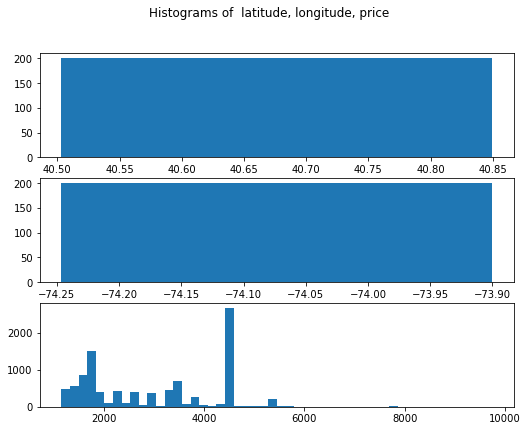

In [102]:

fig, axs = plt.subplots(3)
fig.set_size_inches(8.5, 6.5)
fig.suptitle('Histograms of  latitude, longitude, price')
axs[0].hist(df_final['Lat'], bins=50)
axs[1].hist(df_final['Long'], bins = 50)
axs[2].hist(df_final['Price'], bins = 50)

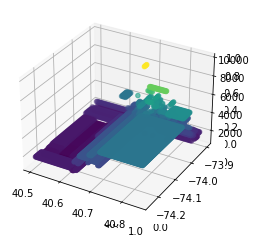

In [103]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
zdata = df_final['Price']
xdata = df_final['Lat']
ydata = df_final['Long']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');